In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# Further Cleanup: job_Skills to list datatype
df['job_skills'] = df['job_skills'].apply(lambda y: ast.literal_eval(y) if pd.notna(y) else y)

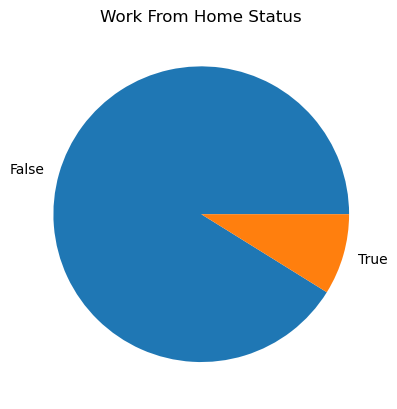

In [6]:
df['job_work_from_home'].value_counts().plot(kind='pie')
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()

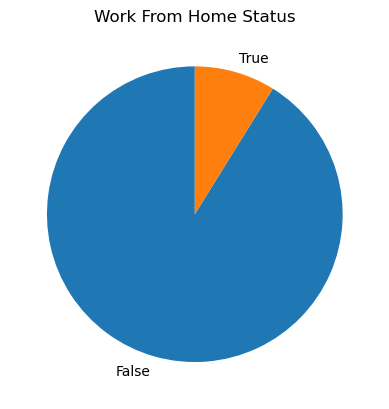

In [7]:
# Adjusting the pie start-point for the "True" portion to the top
# NOTE: 0 degrees is at the right

df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90)
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()

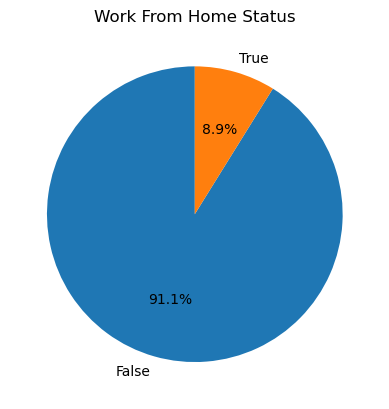

In [11]:
# Adding the percentage for each portion

df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work From Home Status')
plt.ylabel('')
plt.show()

# **Plotting a pie of all our boolean values in a single plot**

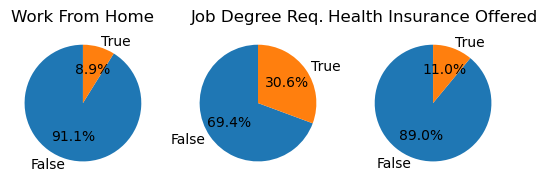

In [22]:
fig, ax = plt.subplots(1, 3)

dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)     # Matplotlib annotation

plt.show()